Operator testing
=========

Have implemented a single SPR operator that additionally creates and deletes multifurcations.  This is a universal operator which should traverse the entire space of trees supported by the $\Lambda$-coalescent.

## Test 1

This first test involves using the SPR operator with polytomy creation turned off and sampling from a regular coalescent distribution:

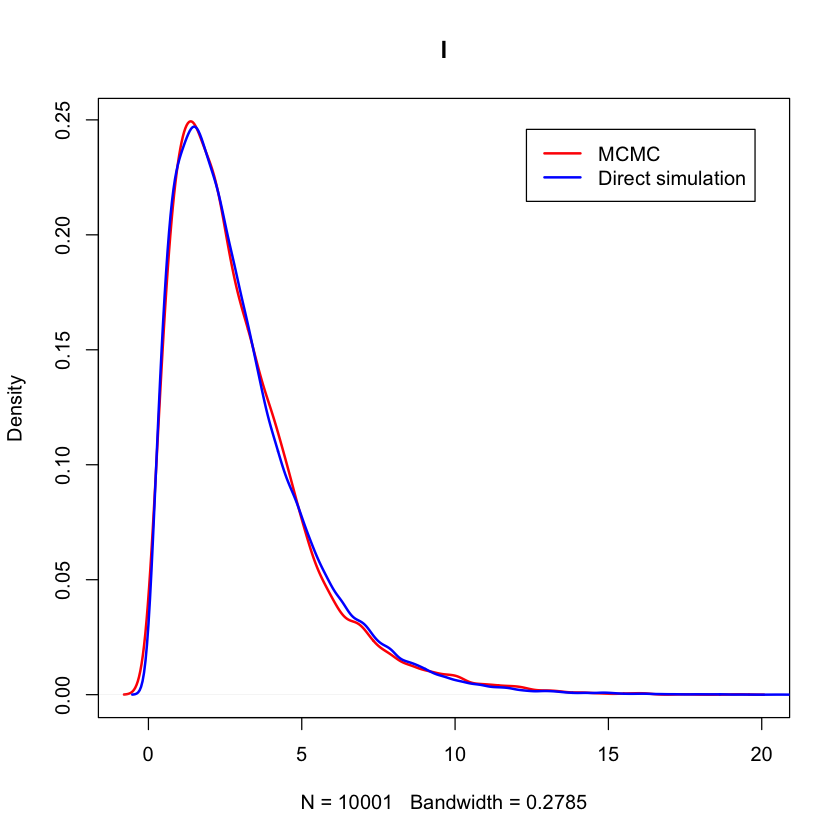

In [3]:
dfs <- read.table("tree_simulator.log", header=T)
df <- read.table("operator_testing.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

## Test 2

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$), but sampling still from the pure coalescent distribution ($\alpha=2$):

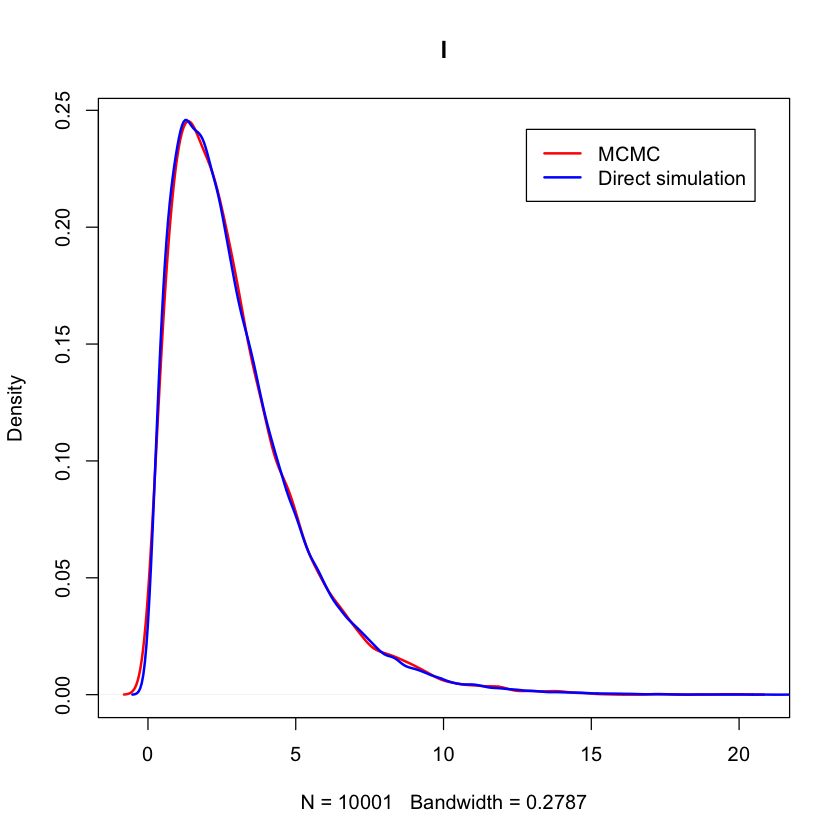

In [27]:
dfs <- read.table("tree_simulator.log", header=T)
df <- read.table("operator_testing.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

## Test 3

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$) and with $\alpha=0.5$, meaning that we are now sampling from a non-trivial $\Lambda$-coalescent distribution.

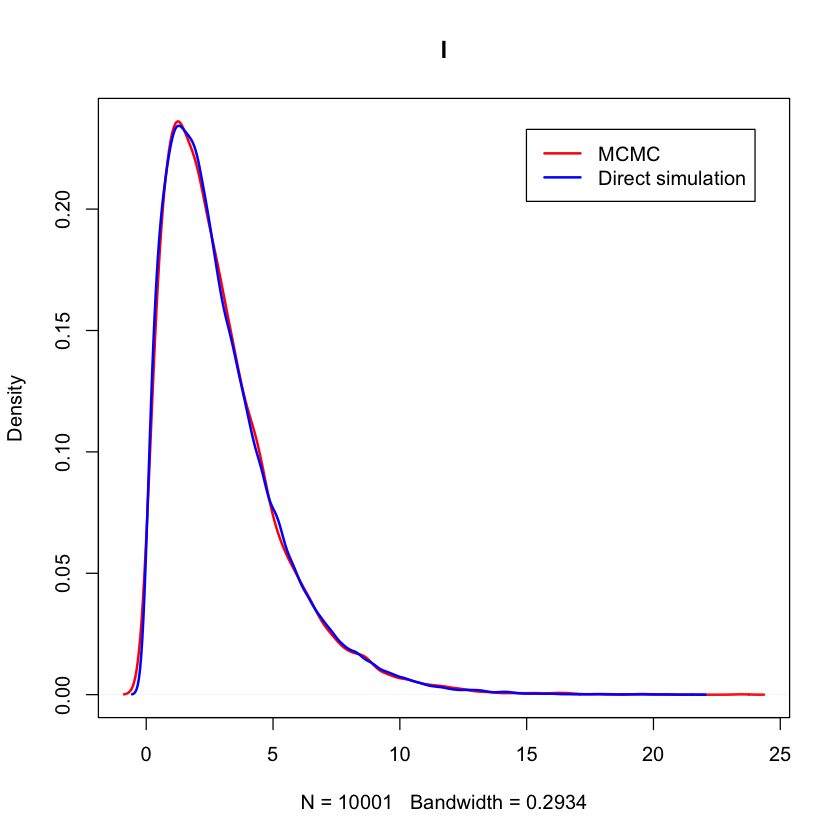

In [29]:
dfs <- read.table("tree_simulator.log", header=T)
df <- read.table("operator_testing.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

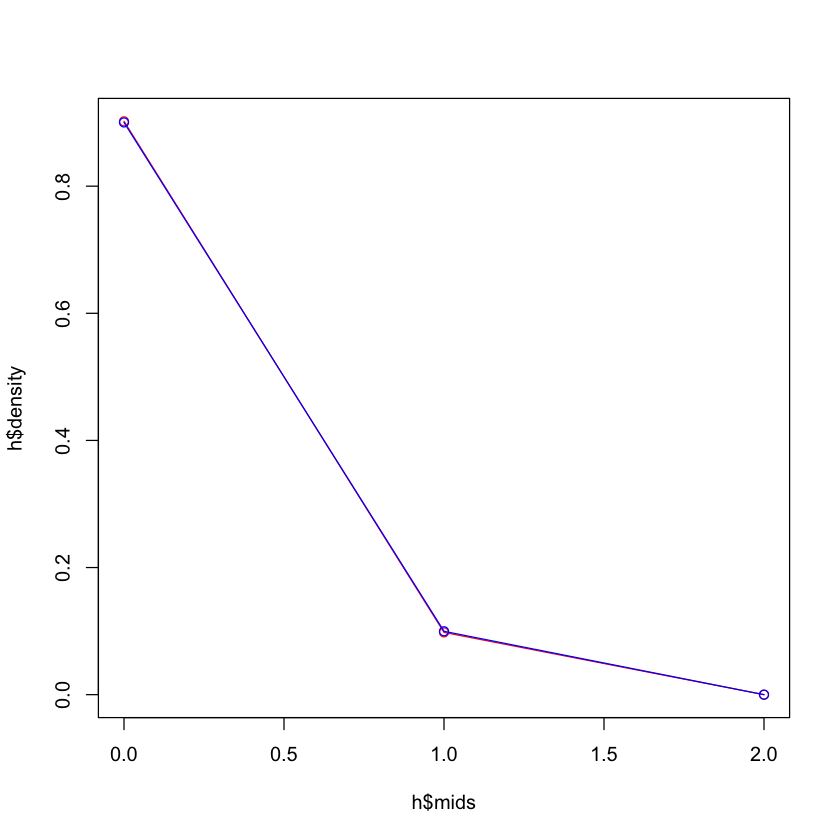

In [33]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,2.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,2.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')